In [ ]:
#importing all tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

!pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras import models
from keras import Model
from tensorflow.keras import layers
import kerastuner as kt
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install scikit-plot
import scikitplot as skplt


import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import make_scorer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
#loading the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***EXPLORATORY DATA ANALYSIS***

In [ ]:
customer_churn_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv")

In [ ]:
customer_churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
customer_churn_dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
customer_churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
customer_churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking class distribution for the taregt variable "churn"
print(customer_churn_dataset['Churn'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


In [ ]:
customer_churn_dataset.shape

(7043, 21)

In [ ]:
customer_churn_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
customer_churn_dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#checking for empty cells in the columns of the dataset
customer_churn_dataset.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
customer_churn_dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

***RELEVANT FEATURES:***

In [ ]:
customer_churn_dataset['TotalCharges'] = pd.to_numeric(customer_churn_dataset['TotalCharges'], errors='coerce')

In [ ]:
customer_churn_dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#categorical and numerical datasets:
numerical = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
numerical_features = pd.DataFrame(customer_churn_dataset[numerical])
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [ ]:
#categorical features
categorical_features = pd.DataFrame(customer_churn_dataset.drop(numerical, axis=1))
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  Churn             7043 non-null   object
dtypes: object(17)


In [ ]:

# Creating a new column using a combination of attributes from each selected column from each row to represent customer profiles
customer_churn_dataset['Profile'] = customer_churn_dataset['SeniorCitizen'].map({0: 'Non-Senior', 1: 'Senior'}) + ' ' + \
                 customer_churn_dataset['gender'] + ' with Partner, ' + 'has Dependents? '+ customer_churn_dataset['Dependents']

pd.DataFrame(customer_churn_dataset['Profile'])


,Profile
0,"Non-Senior Female with Partner, has Dependents..."
1,"Non-Senior Male with Partner, has Dependents? No"
2,"Non-Senior Male with Partner, has Dependents? No"
3,"Non-Senior Male with Partner, has Dependents? No"
4,"Non-Senior Female with Partner, has Dependents..."
...,...
7038,"Non-Senior Male with Partner, has Dependents? Yes"
7039,"Non-Senior Female with Partner, has Dependents..."
7040,"Non-Senior Female with Partner, has Dependents..."
7041,"Senior Male with Partner, has Dependents? No"


In [ ]:
profile_df = pd.DataFrame({'Profile': customer_churn_dataset['Profile'], 'Churn': customer_churn_dataset['Churn']})
churned_profiles = profile_df[profile_df['Churn'] == 'Yes']
print("the profiles which relate to churning a lot includes: ", churned_profiles)

the profiles which relate to churning a lot includes:                                                  Profile Churn
2      Non-Senior Male with Partner, has Dependents? No   Yes
4     Non-Senior Female with Partner, has Dependents...   Yes
5     Non-Senior Female with Partner, has Dependents...   Yes
8     Non-Senior Female with Partner, has Dependents...   Yes
13     Non-Senior Male with Partner, has Dependents? No   Yes
...                                                 ...   ...
7021   Non-Senior Male with Partner, has Dependents? No   Yes
7026  Non-Senior Female with Partner, has Dependents...   Yes
7032       Senior Male with Partner, has Dependents? No   Yes
7034  Non-Senior Female with Partner, has Dependents...   Yes
7041       Senior Male with Partner, has Dependents? No   Yes

[1869 rows x 2 columns]


In [ ]:
pd.DataFrame(customer_churn_dataset['Profile'].value_counts())

,Profile
"Non-Senior Male with Partner, has Dependents? No",1948
"Non-Senior Female with Partner, has Dependents? No",1934
"Non-Senior Male with Partner, has Dependents? Yes",1033
"Non-Senior Female with Partner, has Dependents? Yes",986
"Senior Female with Partner, has Dependents? No",526
"Senior Male with Partner, has Dependents? No",525
"Senior Male with Partner, has Dependents? Yes",49
"Senior Female with Partner, has Dependents? Yes",42


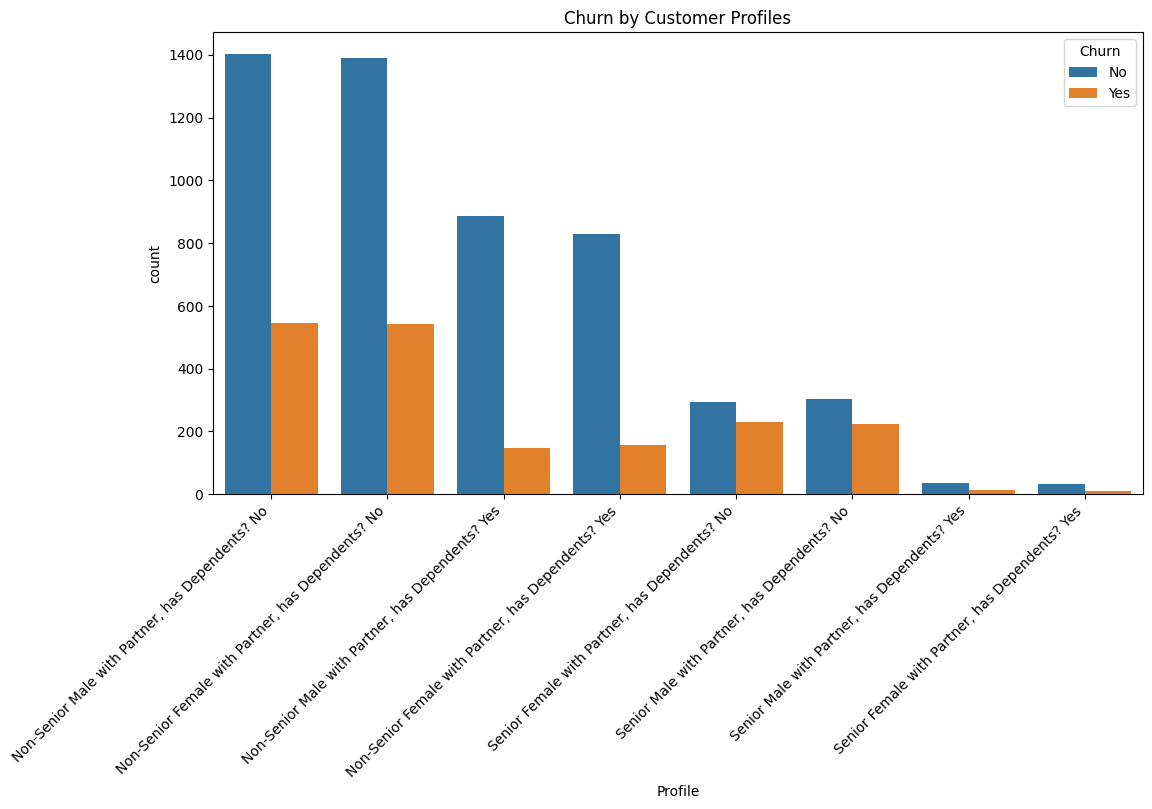

In [ ]:
#showing how the different customer profiles created relate to
plt.figure(figsize=(12, 6))
sns.countplot(x='Profile', hue='Churn', data=customer_churn_dataset, order=customer_churn_dataset['Profile'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title("Churn by Customer Profiles")
plt.show()

***COREELATION ANALYSIS, FEATURE SELECTION, SCALING***

In [ ]:
customer_churn_dataset[1:50]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Profile
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,"Non-Senior Male with Partner, has Dependents? No"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"Non-Senior Male with Partner, has Dependents? No"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"Non-Senior Male with Partner, has Dependents? No"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"Non-Senior Female with Partner, has Dependents..."
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,"Non-Senior Female with Partner, has Dependents..."
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,"Non-Senior Male with Partner, has Dependents? Yes"
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,"Non-Senior Female with Partner, has Dependents..."
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,"Non-Senior Female with Partner, has Dependents..."
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,"Non-Senior Male with Partner, has Dependents? Yes"
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,"Non-Senior Male with Partner, has Dependents? Yes"


In [ ]:
#encoding the categorical data for correlation
l = LabelEncoder()
for i in categorical_features:
  categorical_features[i] = l.fit_transform(categorical_features[i])

In [ ]:
categorical_features[1:50]

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
5,6551,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1
6,1002,1,0,1,1,2,1,0,2,0,0,2,0,0,1,1,0
7,4770,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3,0
8,5604,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,1
9,4534,1,0,1,1,0,0,2,2,0,0,0,0,1,0,0,0
10,6871,1,1,1,1,0,0,2,0,0,0,0,0,0,1,3,0


In [ ]:
#combining the encoded categorical datasets and the numeric features dataset
numerical_customer_churn_data = pd.concat([numerical_features, categorical_features], axis=1)

In [ ]:
numerical_customer_churn_data.isnull().sum()

SeniorCitizen        0
tenure               0
MonthlyCharges       0
TotalCharges        11
customerID           0
gender               0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Churn                0
dtype: int64

In [ ]:
numerical_customer_churn_data['TotalCharges'] = numerical_customer_churn_data['TotalCharges'].fillna(method='ffill')

In [ ]:
numerical_customer_churn_data.isnull().sum()

SeniorCitizen       0
tenure              0
MonthlyCharges      0
TotalCharges        0
customerID          0
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [ ]:
#using feature importance to show the most important features
X = numerical_customer_churn_data.drop('Churn', axis = 1)
y = numerical_customer_churn_data['Churn']


In [ ]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df)

             Feature  Importance
3       TotalCharges    0.157511
2     MonthlyCharges    0.148843
1             tenure    0.137154
4         customerID    0.129836
17          Contract    0.080266
19     PaymentMethod    0.042061
14       TechSupport    0.040254
11    OnlineSecurity    0.039452
10   InternetService    0.028765
5             gender    0.023276
18  PaperlessBilling    0.022471
12      OnlineBackup    0.021983
13  DeviceProtection    0.021628
9      MultipleLines    0.019698
6            Partner    0.018557
0      SeniorCitizen    0.017958
7         Dependents    0.016555
16   StreamingMovies    0.014800
15       StreamingTV    0.014412
8       PhoneService    0.004519


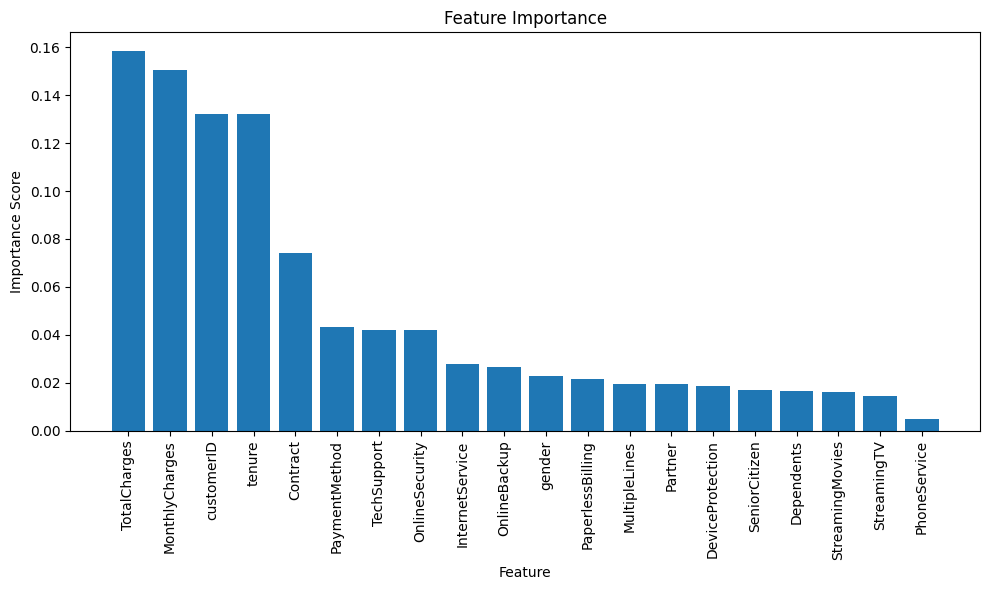

In [ ]:
# Example feature importance data
feature_names = [
    'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'customerID',
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

feature_importance_scores = [
    0.017094, 0.132030, 0.150506, 0.158365, 0.132220,
    0.022993, 0.019248, 0.016577, 0.004876, 0.019442,
    0.027928, 0.041940, 0.026447, 0.018802, 0.042071,
    0.014608, 0.015965, 0.074010, 0.021718, 0.043159
]

# Create a DataFrame to match features with their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_scores
})

# Sort the DataFrame by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align="center")
plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation='vertical')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

In [ ]:
#creating feature subset from the top correlated features and the feature importance and the analysis conducted on the depenedent variables:
selected_features = ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'TotalCharges',
       'OnlineBackup', 'MonthlyCharges', 'PaperlessBilling',
       'DeviceProtection', 'Dependents']
feature_subset = numerical_customer_churn_data[selected_features]
feature_subset

,Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,OnlineBackup,MonthlyCharges,PaperlessBilling,DeviceProtection,Dependents
0,0,1,0,0,29.85,2,29.85,1,0,0
1,1,34,2,0,1889.50,0,56.95,0,2,0
2,0,2,2,0,108.15,2,53.85,1,0,0
3,1,45,2,2,1840.75,0,42.30,0,2,0
4,0,2,0,0,151.65,0,70.70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7038,1,24,2,2,1990.50,0,84.80,1,2,1
7039,1,72,0,0,7362.90,2,103.20,1,2,1
7040,0,11,2,0,346.45,0,29.60,1,0,1
7041,0,4,0,0,306.60,0,74.40,1,0,0


In [ ]:
#choosing the independent and dependent variables
X = feature_subset
y = numerical_customer_churn_data['Churn']

In [ ]:
#scaling x (dependent variables)
sc = StandardScaler()
scaled_data = sc.fit_transform(X)
scaled_data

array([[-0.8282069 , -1.27744458, -0.91883775, ...,  0.8297975 ,
        -1.02791014, -0.65401193],
       [ 0.37127103,  0.06632742,  1.40732123, ..., -1.20511329,
         1.24511061, -0.65401193],
       [-0.8282069 , -1.23672422,  1.40732123, ...,  0.8297975 ,
        -1.02791014, -0.65401193],
       ...,
       [-0.8282069 , -0.87024095,  1.40732123, ...,  0.8297975 ,
        -1.02791014,  1.5290241 ],
       [-0.8282069 , -1.15528349, -0.91883775, ...,  0.8297975 ,
        -1.02791014, -0.65401193],
       [ 1.57074896,  1.36937906,  1.40732123, ...,  0.8297975 ,
         1.24511061, -0.65401193]])

***CREATING AN MLP WITH THE KERAS FUNCTIONAL API***

In [ ]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.2, random_state=42)

In [ ]:
#would make use of a GPU if available to make training faster
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [ ]:
#tradional training before grid search
input_layer = Input(shape=(X_train.shape[1],))

# Hidden layers
hidden1 = Dense(64, activation='relu')(input_layer)
hidden2 = Dense(32, activation='relu')(hidden1)
hidden3 = Dense(16, activation='relu')(hidden2)

# Output layer
output_layer = Dense(1, activation='sigmoid')(hidden3)

# Create model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4829 - accuracy: 0.7664 - val_loss: 0.4187 - val_accuracy: 0.7906
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.7899 - val_loss: 0.4118 - val_accuracy: 0.7950
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.7912 - val_loss: 0.4121 - val_accuracy: 0.7977
Epoch 4/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.7970 - val_loss: 0.4086 - val_accuracy: 0.7959
Epoch 5/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7954 - val_loss: 0.4060 - val_accuracy: 0.7977
Epoch 6/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.7974 - val_loss: 0.4065 - val_accuracy: 0.8012
Epoch 7/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.8014 - val_loss: 0.4094 - val_accuracy: 0.7986
Epoch 

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {accuracy}")

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print(f"Initial AUC: {auc}")

45/45 [==============================] - 0s 1ms/step
Accuracy: 0.794889992902768
AUC: 0.7292691005827735


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


45/45 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7949
Test Accuracy: 79.49%


In [ ]:
#performing grid search to determine the best parameters for the MLP
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 200, 300],
    'batch_size': [8,32,64]
    }


# Instantiate MLPClassifier
mlp = MLPClassifier()

# using Kfold for cv
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


# Instantiate GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'max_iter': 200, 'solver': 'sgd'}
Test Accuracy: 0.8112136266855926


In [ ]:
#using the best parameters from the grid search to create the keras functional api model
input_layer = Input(shape=(X_train.shape[1],))

# Add hidden layers based on best_params
hidden_layer1 = Dense(units=128, activation='tanh')(input_layer)
hidden_layer2 = Dense(units=64, activation='tanh')(hidden_layer1)
hidden_layer3 = Dense(units=32, activation='tanh')(hidden_layer2)

# Add the output layer
output_layer = Dense(units=1, activation='sigmoid')(hidden_layer3)

# Create the Keras Functional API model
keras_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model using 'sgd' optimizer and 'binary_crossentropy' loss
keras_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to your data
history = keras_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 0.5336 - accuracy: 0.7311 - val_loss: 0.4417 - val_accuracy: 0.7986
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.7870 - val_loss: 0.4218 - val_accuracy: 0.7977
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.7866 - val_loss: 0.4187 - val_accuracy: 0.7941
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7897 - val_loss: 0.4161 - val_accuracy: 0.7986
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.7868 - val_loss: 0.4157 - val_accuracy: 0.7968
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7886 - val_loss: 0.4147 - val_accuracy: 0.8012
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7912 - val_loss: 0.4145 - val_accuracy: 0.8048

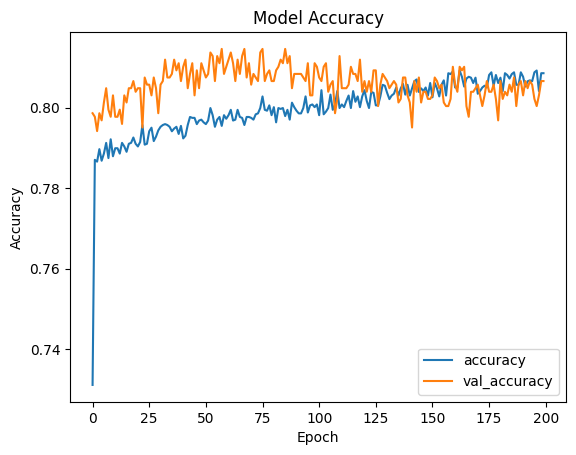

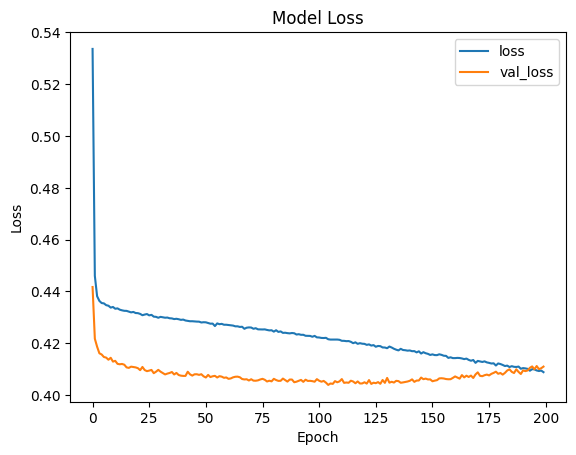

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
test_predictions = keras_model.predict(X_test)

# Convert predictions to class labels (e.g., 0 or 1)
test_predictions = (test_predictions > 0.5).astype(int)  # Adjust the threshold if needed

# Create a confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(cm)

# Generate a classification report
report = classification_report(y_test, test_predictions)
print("Classification Report:")
print(report)


45/45 [==============================] - 0s 1ms/step
Confusion Matrix:
[[941  95]
 [173 200]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
#evaluating model
test_predictions = test_predictions

# Calculate accuracy of the initial model
final_accuracy = accuracy_score(y_test, test_predictions)
print(" Model Accuracy:", final_accuracy)

# Calculate AUC score of the initial model
final_auc = roc_auc_score(y_test, test_predictions)
print(" Model AUC Score:", final_auc)

 Model Accuracy: 0.8097941802696949
 Model AUC Score: 0.7222470938958875


In [ ]:
keras_model.predict(X_test)

45/45 [==============================] - 0s 1ms/step


array([[0.65969086],
       [0.1546455 ],
       [0.00544959],
       ...,
       [0.02876741],
       [0.02627825],
       [0.30704838]], dtype=float32)

In [ ]:
# Save the trained Keras model
keras_model.save('/content/drive/MyDrive/Colab Notebooks/final_keras_model1.h5')


In [ ]:
from joblib import dump

scaler_filename = '/content/drive/MyDrive/Colab Notebooks/scaler.joblib'

# Save the scaler object to the specified path
dump(sc, scaler_filename)


['/content/drive/MyDrive/Colab Notebooks/scaler.joblib']